<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  int64  
 6   Occupation                100000 non-null  object 
 7   Annual_Income             99656 non-null   float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

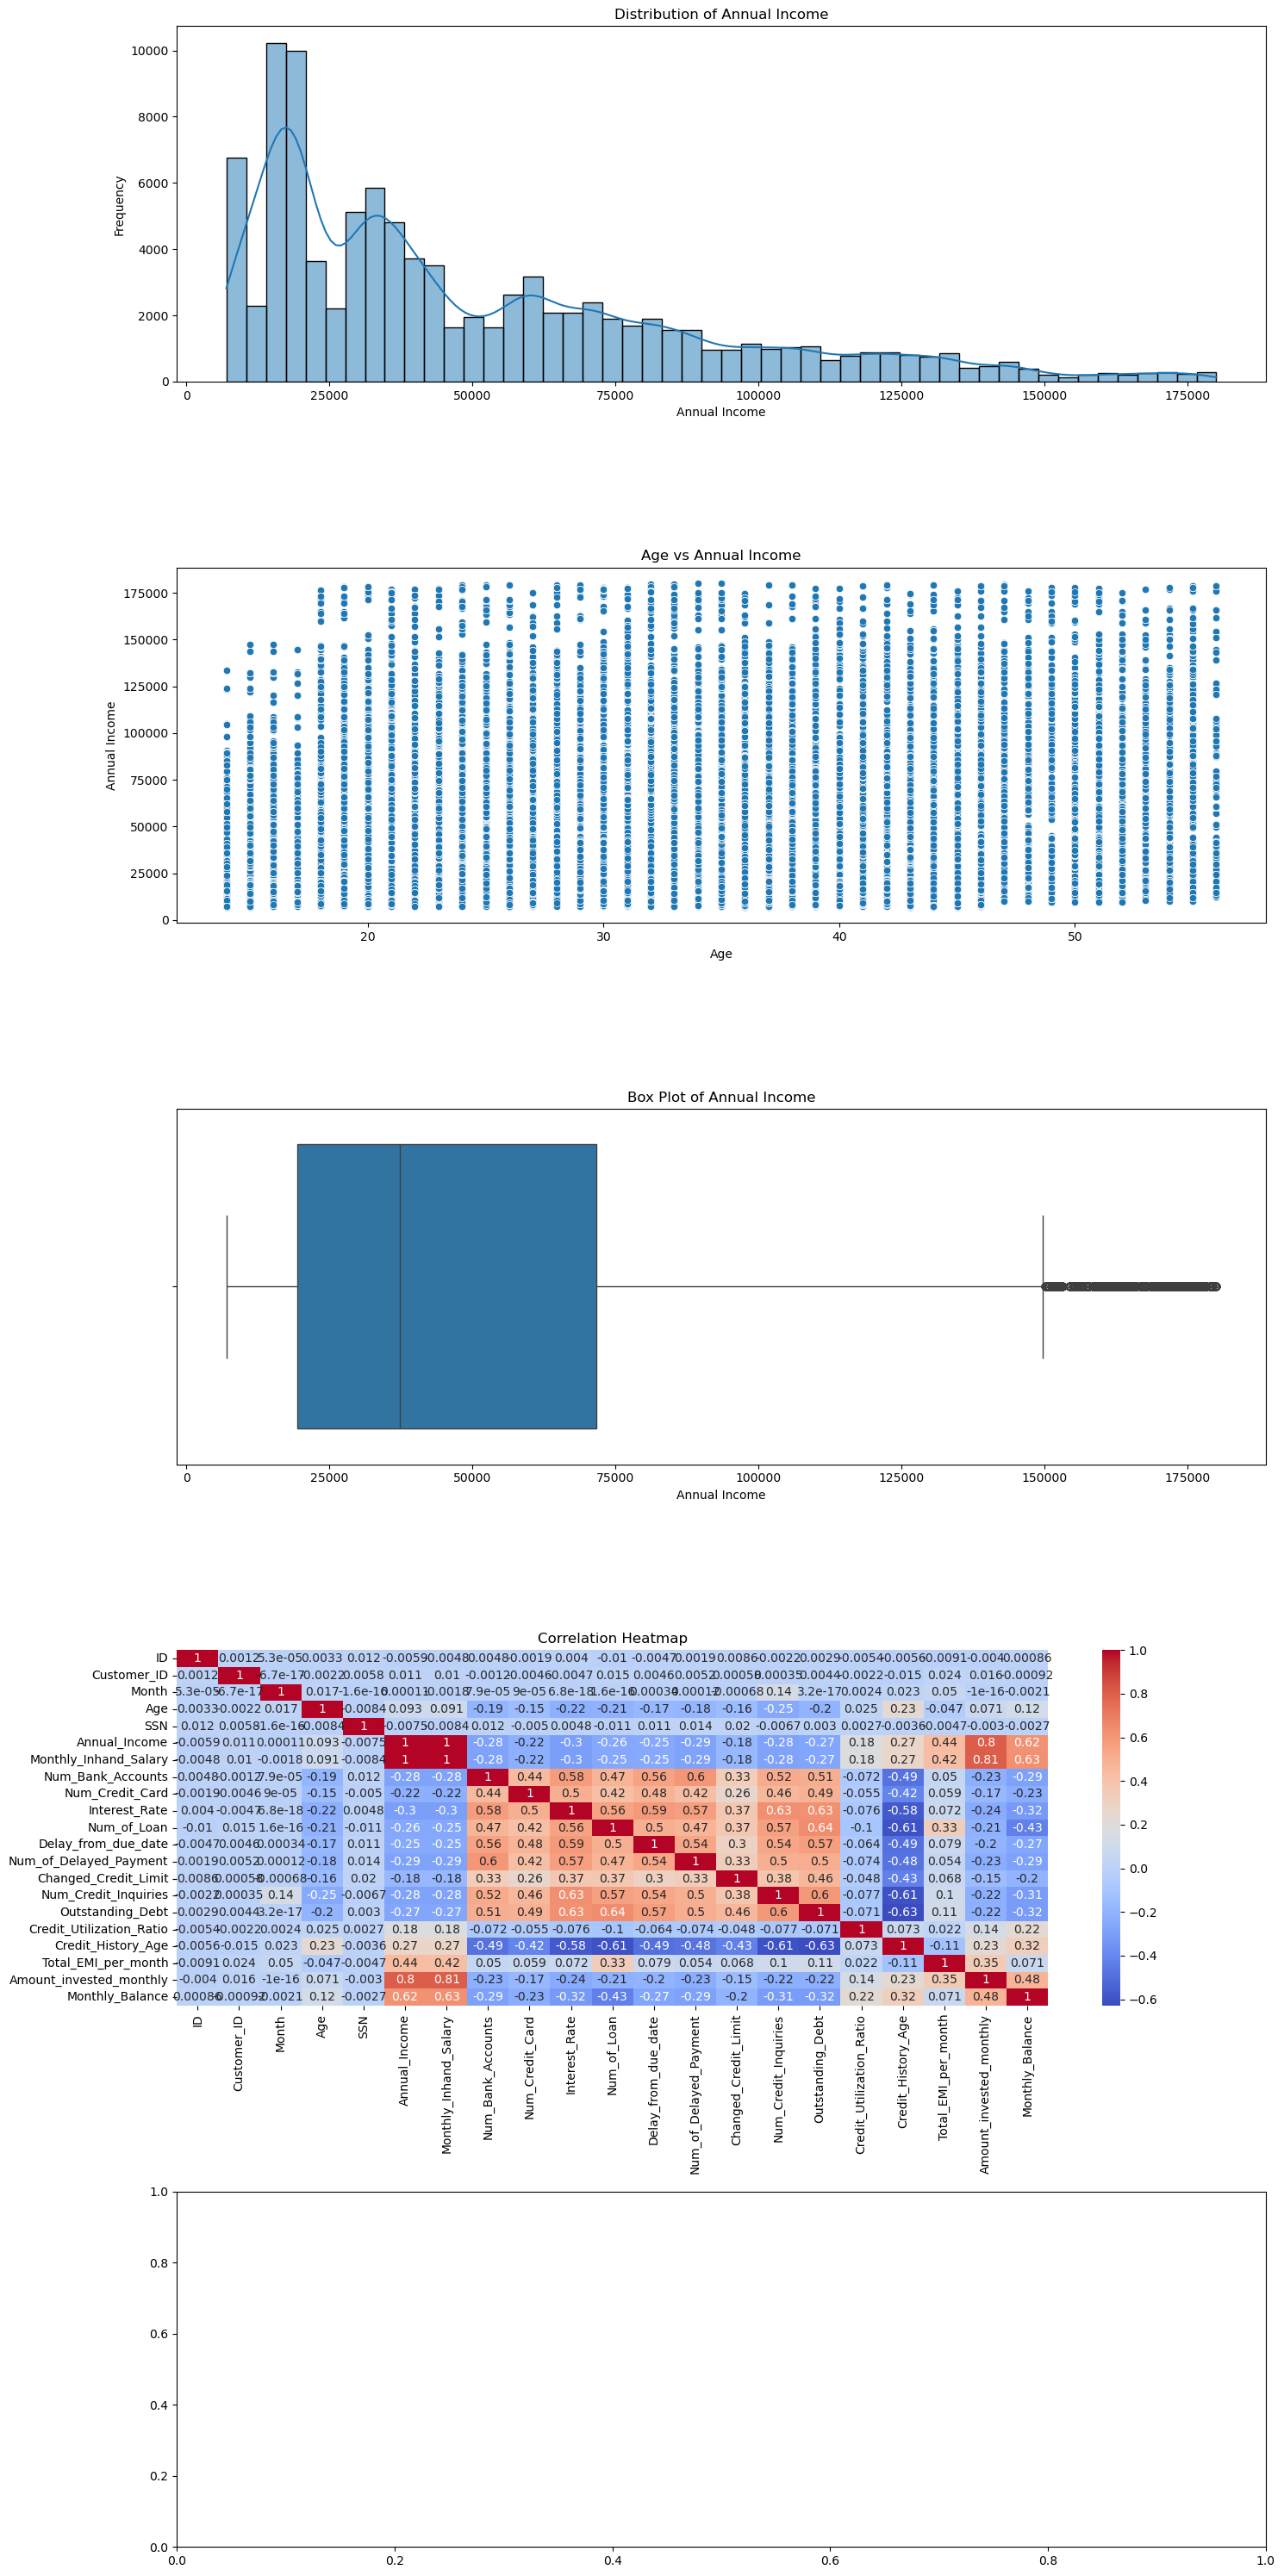

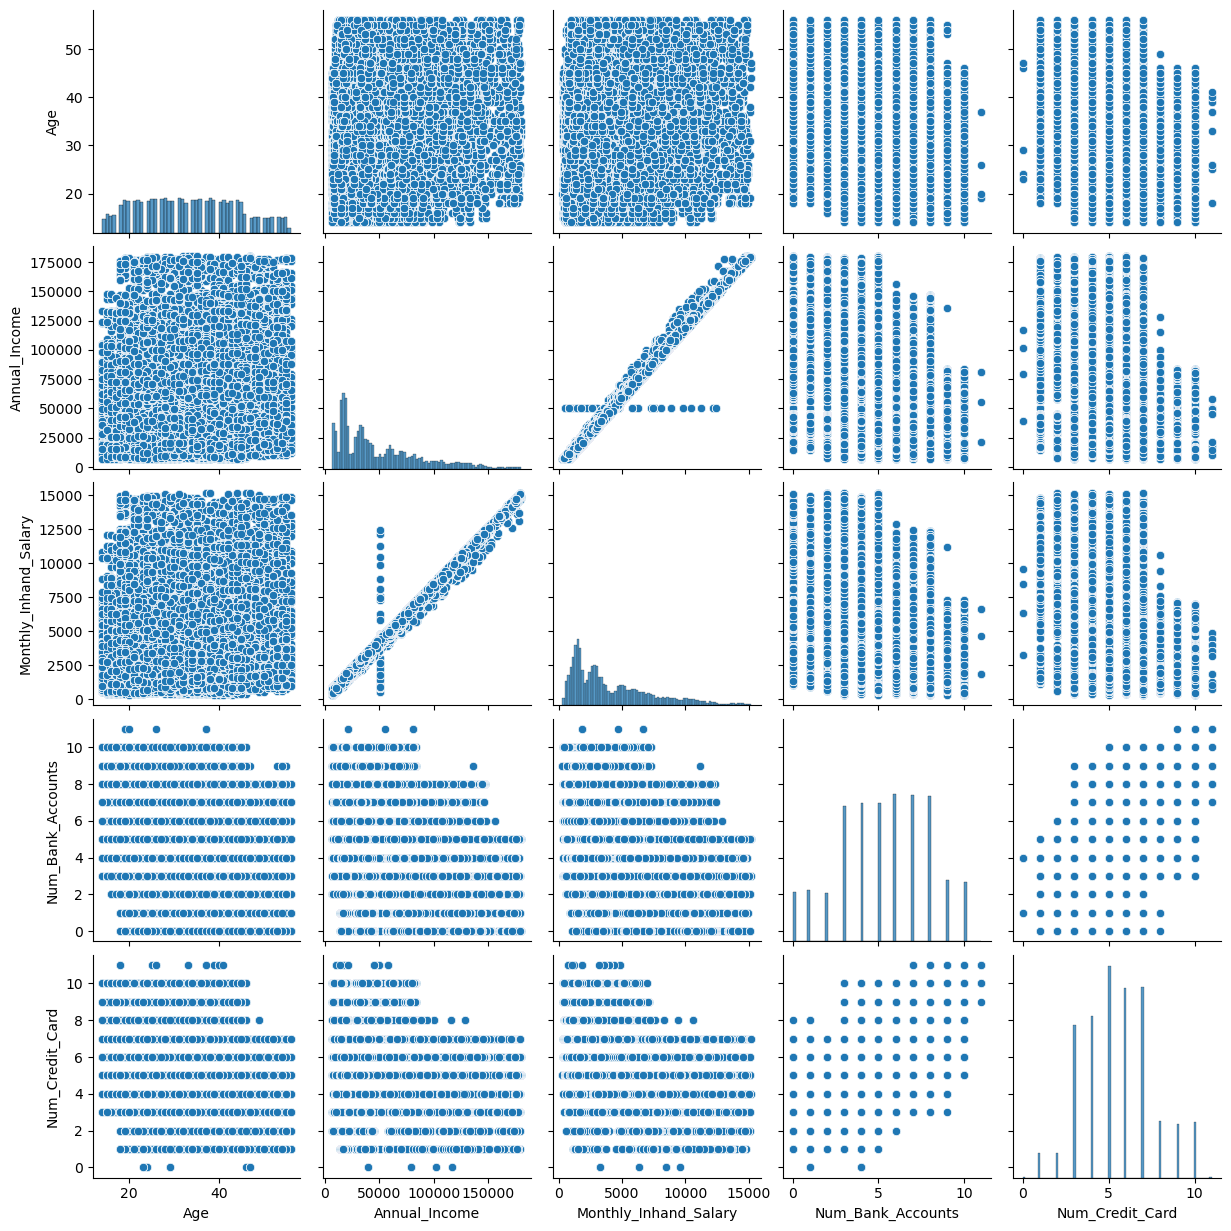

     ID  Customer_ID  Month           Name  Age        SSN  Occupation  \
0  5634         3392      1  Aaron Maashoh   23  821000265          12   
1  5635         3392      2  Aaron Maashoh   23  821000265          12   
2  5636         3392      3  Aaron Maashoh   23  821000265          12   
3  5637         3392      4  Aaron Maashoh   23  821000265          12   
4  5638         3392      5  Aaron Maashoh   23  821000265          12   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0   19114.120000            1824.843333                  3  ...        Good   
1   19114.120000            1824.843333                  3  ...        Good   
2   19114.120000            1824.843333                  3  ...        Good   
3   50516.683187            1824.843333                  3  ...        Good   
4   50516.683187            1824.843333                  3  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0          

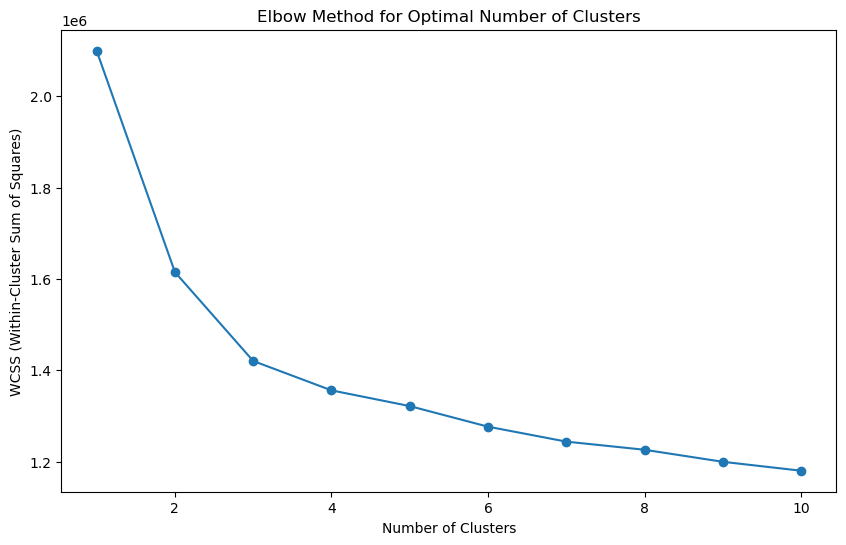

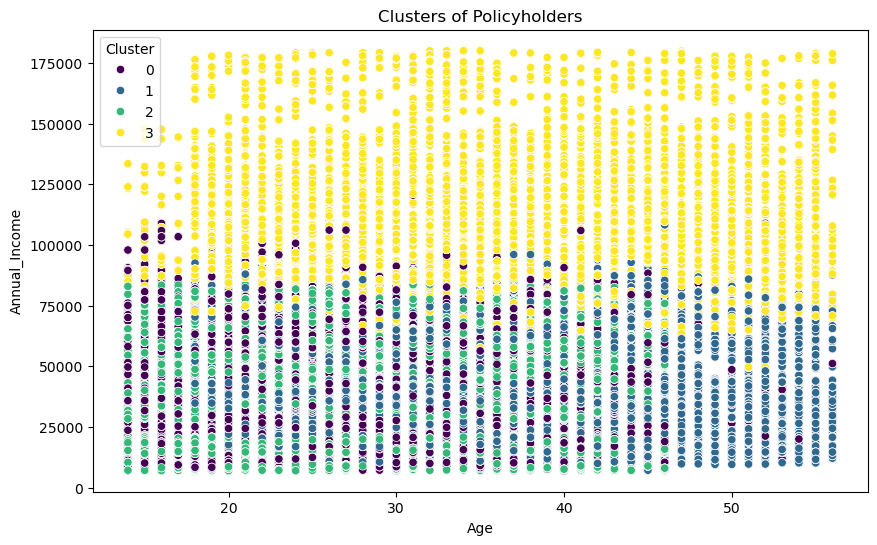

Cluster Summary:
                    ID   Customer_ID     Month        Age           SSN  \
Cluster                                                                  
0        79553.634649  25722.540552  4.565769  29.305693  5.103177e+08   
1        81720.517448  25894.846322  4.434245  37.646224  4.998123e+08   
2        80803.552281  26169.444416  4.512119  29.804350  4.965283e+08   
3        79924.803591  26149.463256  4.512100  35.769503  4.959854e+08   

         Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
Cluster                                                            
0         35914.827861            2980.800025           5.723386   
1         35733.029550            2963.612625           3.885742   
2         32989.818365            2739.181000           7.930181   
3        111889.892175            9310.585370           3.831727   

         Num_Credit_Card  Interest_Rate  ...  Delay_from_due_date  \
Cluster                                  ...               

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
file_path = 'D:\\GUVI_Projects\\train.csv'
insurance_data = pd.read_csv(file_path)

# Display dataset information
print(insurance_data.info())
print(insurance_data.describe())
print(insurance_data.head())

# Check for missing values
print(insurance_data.isnull().sum())

# Handling missing values without inplace
insurance_data['Annual_Income'] = insurance_data['Annual_Income'].fillna(insurance_data['Annual_Income'].mean())
insurance_data['Changed_Credit_Limit'] = insurance_data['Changed_Credit_Limit'].fillna(insurance_data['Changed_Credit_Limit'].mean())

# Check for missing values again
print(insurance_data.isnull().sum())

# Advanced EDA
fig, axs = plt.subplots(5, 1, figsize=(15, 30))

# Distribution of Annual Income
sns.histplot(insurance_data['Annual_Income'], bins=50, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Annual Income')
axs[0].set_xlabel('Annual Income')
axs[0].set_ylabel('Frequency')

# Relationship between Age and Annual Income
sns.scatterplot(data=insurance_data, x='Age', y='Annual_Income', ax=axs[1])
axs[1].set_title('Age vs Annual Income')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Annual Income')

# Box plot of Annual Income
sns.boxplot(data=insurance_data, x='Annual_Income', ax=axs[2])
axs[2].set_title('Box Plot of Annual Income')
axs[2].set_xlabel('Annual Income')

# Correlation heatmap
numeric_cols = insurance_data.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(insurance_data[numeric_cols].corr(), annot=True, cmap='coolwarm', ax=axs[3])
axs[3].set_title('Correlation Heatmap')

# Adjust layout
plt.tight_layout()
plt.show()

# Pair plot
sns.pairplot(insurance_data[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card']])
plt.show()

# Data Preparation for Model Training
# Encode categorical variables
label_encoder = LabelEncoder()
insurance_data['Occupation'] = label_encoder.fit_transform(insurance_data['Occupation'])
insurance_data['Type_of_Loan'] = label_encoder.fit_transform(insurance_data['Type_of_Loan'])
insurance_data['Payment_of_Min_Amount'] = label_encoder.fit_transform(insurance_data['Payment_of_Min_Amount'])
insurance_data['Payment_Behaviour'] = label_encoder.fit_transform(insurance_data['Payment_Behaviour'])
insurance_data['Credit_Score'] = label_encoder.fit_transform(insurance_data['Credit_Score'])

# Check the transformed dataset
print(insurance_data.head())

# Split the Dataset
# Define features (X) and target variable (y)
X = insurance_data.drop(columns=['Annual_Income'])  # Drop the target column
y = insurance_data['Annual_Income']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Select only numeric columns for scaling
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train_numeric = X_train[numeric_features]
X_test_numeric = X_test[numeric_features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Check the scaled data
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

# Train a Regression Model for Annual Income Prediction
# Initialize the Linear Regression model
regressor = LinearRegression()

# Fit the model on the training data
regressor.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Train a Decision Tree Classifier for Fraud Detection
# Define features (X) and target variable (y)
X = insurance_data.drop(columns=['Credit_Score', 'Name', 'Credit_Mix'])  # Drop the target column and non-numeric columns
y = insurance_data['Credit_Score']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Select only numeric columns
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train_numeric = X_train[numeric_features]
X_test_numeric = X_test[numeric_features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier()

# Fit the model on the training data
classifier.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Implement a Clustering Model
# Use K-Means clustering to identify customer segments
# Define features (X) for clustering
X = insurance_data.drop(columns=['Name', 'Credit_Mix'])  # Drop non-numeric columns

# Select only numeric columns
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[numeric_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Apply KMeans with the optimal number of clusters (assuming 4 clusters based on the elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
insurance_data['Cluster'] = clusters

# Visualize the clusters (example using Age and Annual_Income)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=insurance_data, x='Age', y='Annual_Income', hue='Cluster', palette='viridis')
plt.title('Clusters of Policyholders')
plt.show()

# Tailored marketing strategies and product offerings for specific clusters
numeric_features_with_cluster = numeric_features.tolist() + ['Cluster']
cluster_summary = insurance_data[numeric_features_with_cluster].groupby('Cluster').mean()
print("Cluster Summary:\n", cluster_summary)

# Recommendations based on clusters
for cluster in cluster_summary.index:
    print(f"\nCluster {cluster} Recommendations:")
    if cluster_summary.loc[cluster, 'Age'] < 30:
        print(" - Target younger policyholders with online and mobile app services.")
    else:
        print(" - Offer in-person services and personalized advice for older policyholders.")
    
    if cluster_summary.loc[cluster, 'Annual_Income'] > cluster_summary['Annual_Income'].median():
        print(" - Provide premium services and exclusive offers for high-income policyholders.")
    else:
        print(" - Offer budget-friendly insurance plans for lower-income policyholders.")
    
    if cluster_summary.loc[cluster, 'Num_Bank_Accounts'] > 5:
        print(" - Cross-sell financial products such as loans and credit cards.")
    else:
        print(" - Promote basic financial literacy and savings accounts.")

    if cluster_summary.loc[cluster, 'Monthly_Inhand_Salary'] > cluster_summary['Monthly_Inhand_Salary'].median():
        print(" - Suggest investment plans and wealth management services.")
    else:
        print(" - Offer basic savings and fixed deposit accounts.")

